<a href="https://colab.research.google.com/github/swapnil-vyom/ML_learn/blob/main/1%20Linear%20Regression/ML_Lab_3_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

Simple Linear Regression is a linear approach to modeling the relationship between single independent variable with one dependent variable. It finds a linear funcion that maps dependent variable y as a function of independent variable x. (Wikipedia)

Usually the function is written as $$ y = mx + c $$ or alternatively, $$  y =\theta_1 x + \theta_0 $$

Reference: https://towardsdatascience.com/

The project has the following tasks:

1. Understand the data that you are going to work with and convert it to a data frame.
2. Prepare the data for building the model.
3. Create and build the machine learning model.
4. Visualize the results
5. Measure the performance of the model.

## Task 1: Import  dataset

In [1]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [18]:
# prompt: read data from my system with upload

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

data = pd.read_csv(list(uploaded.keys())[0]) #
# Now you can work with the dataframe 'df'
data.head()

Saving Salary_dataset.csv to Salary_dataset (1).csv


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [41]:
## Import the dataset


# change the path as necessary

X = data.iloc[:, 1:-1].values # copy all columns excluding last column
Y = data.iloc[:, -1:].values   # copy the last column only
X

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [42]:
Y

array([[ 39344.],
       [ 46206.],
       [ 37732.],
       [ 43526.],
       [ 39892.],
       [ 56643.],
       [ 60151.],
       [ 54446.],
       [ 64446.],
       [ 57190.],
       [ 63219.],
       [ 55795.],
       [ 56958.],
       [ 57082.],
       [ 61112.],
       [ 67939.],
       [ 66030.],
       [ 83089.],
       [ 81364.],
       [ 93941.],
       [ 91739.],
       [ 98274.],
       [101303.],
       [113813.],
       [109432.],
       [105583.],
       [116970.],
       [112636.],
       [122392.],
       [121873.]])

In [43]:
# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30, 1)
(30, 1)


## Task 2: Prepare and visualize the given data set

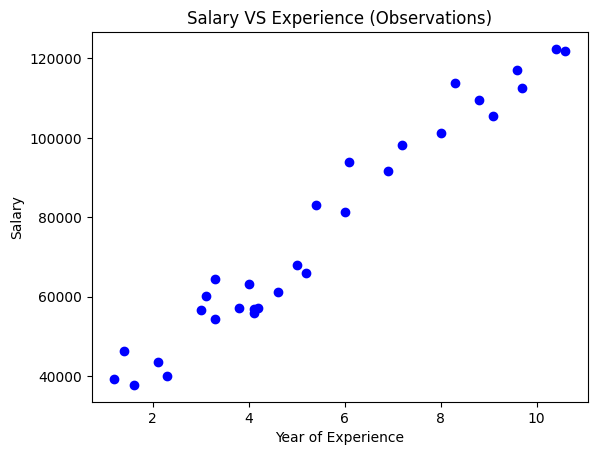

In [44]:
# Visualize the dataset

plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [53]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

# There are 30 observations or rows in the dataset.
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size.
# In this example test_size=1/3 says that 20 observations are used for training
# and rest 10 observations are used for testing.

# randam_state is the seed for the random number generator.


## Task 3: Create and train the machine learning model

In [54]:
# Fit Simple Linear Regression to the Training dataset

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)


LinearRegression()

## Task 4: Visualize the results

In [55]:
# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [[9345.94244312]]
Intercept = Theta0 =  [25882.59799972]


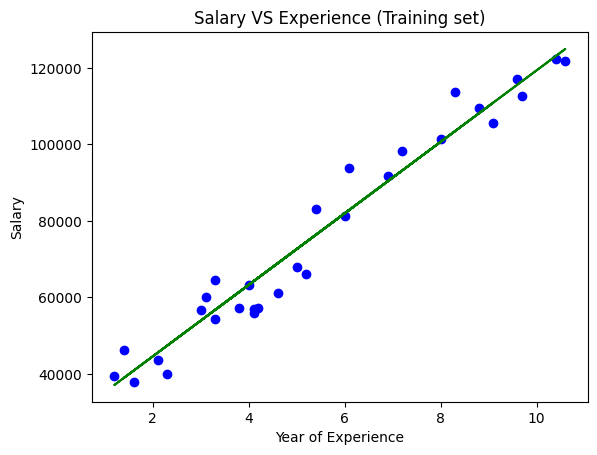

In [56]:
# Visualize the fitted regression line

viz = plt
viz.scatter(X, Y, color='blue')
viz.plot(X_train, model.predict(X_train), color='green')
viz.title('Salary VS Experience (Training set)')
viz.xlabel('Year of Experience')
viz.ylabel('Salary')
viz.show()

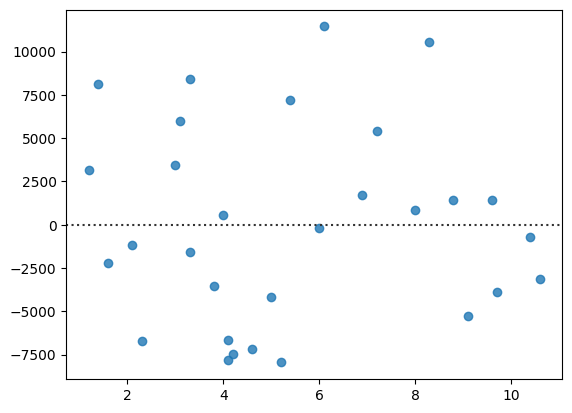

In [57]:
# Plot the residuals

import seaborn
seaborn.residplot(x=X, y=Y)
plt.show()

## Task 5: Making Predictions

In [58]:
# Predict salary that can be offered for 7 years of experience

x = np.atleast_1d(7).reshape(-1,1) # convert scalar to array

# Predict the value
y_pred = model.predict(x)

print('For x= 7 yrs of experience, predicted salary = ', y_pred)

For x= 7 yrs of experience, predicted salary =  [[91304.19510158]]


In [59]:
Y_predict = model.predict(X_test)

## Task 6: Performance measures

In [62]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

# The mean squared error
print("Mean squared error train = %.2f" % mean_squared_error(model.predict(X_train),Y_train)) #training Error
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict)) #test error
print("Mean absolute error = %.2f" % mean_absolute_error(Y_test, Y_predict)) #test error
# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error train = 36852948.76
Mean squared error = 21026037.33
Mean absolute error = 3426.43
Variance score = 0.97
